In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv("data/training_data_processed_stop_word_removed.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac..."


In [4]:
# Normalizing the names and combining various sub-genres into one genre
df['Genre'] = df['Genre'].str.lower()
df['Genre'] = df['Genre'].apply(lambda x: "punk" if "punk" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rock" if "rock" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "jazz" if "jazz" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "pop" if "pop" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "metal" if "metal" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rap" if "rap" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "hip-hop" if ("hip-hop" in x or "hip hop" in x or "hiphop" in x) else x)
df['Genre'] = df['Genre'].apply(lambda x: "country" if "country" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rnb" if ("rnb" == x or "r&b" in x or "r n b" in x or "r & b" in x or "rhythum and blues tag" in x or "rhythm & blues" in x or "rhythm and blues" in x or "rhythm n blues" in x) else x)
df['Genre'] = df['Genre'].apply(lambda x: "electronic" if ("house" == x or "trance" == x or "dance" == x or "chillout" == x or "drum and bass" == x or "disco" == x or "dubstep" == x) else x)
# Filtering out genres with low song counts
df = df.groupby('Genre').filter(lambda x: len(x) > 1650)
print("Number of genres: ",df['Genre'].nunique())
df['Genre'].value_counts()

Number of genres:  16


rock           29916
metal          19420
pop            12812
hip-hop        10333
indie           6020
electronic      5866
rap             4535
rnb             4271
soul            3739
punk            3440
country         3135
jazz            2969
folk            2724
alternative     1994
blues           1838
reggae          1697
Name: Genre, dtype: int64

In [5]:
df['LyricsList'] = df.apply(lambda x: eval(x['LyricProcessed']), axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [..."


In [ ]:
df.to_csv("data/Processed_Lyric_Dataset.csv") # Saving the dataset

In [7]:
df['LyricsProcessed'] = df['LyricsList'].apply(lambda x: (' '.join(list(map(' '.join, x)))))

In [8]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...


In [8]:
# grouping all songs of a genre together
genre_df = df.groupby(['Genre'])['LyricsProcessed'].apply(' '.join).reset_index()
genre_df.head()

,Genre,LyricsProcessed
0,alternative,ten time nine know lie nine time outta ten kno...
1,blues,heard church bell ring heard choir sing saw lo...
2,country,yeehaw oh oh oh texas texas oh oh oh texas com...
3,electronic,ready dance make body crazy let show do brazil...
4,folk,one last drink wishful thinkin another bar get...


In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
all_stopwords.append('go')
all_stopwords.append('im')
all_stopwords.append('get')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tfidf_vectorizer = TfidfVectorizer(stop_words=all_stopwords)
genre_tfidf = tfidf_vectorizer.fit_transform(genre_df['LyricsProcessed'])
feature_names = tfidf_vectorizer.get_feature_names()
genre_dense = genre_tfidf.todense()
genre_denselist = genre_dense.tolist()
genre_dense_df = pd.DataFrame(genre_denselist, columns=feature_names)
genre_dense_df.head()

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,000000,0000000,00000000,000000000,0000000000,00000000000,...,올라,잡으면,진실이,천천히,함께,현실,흐름을,ﬁnd,ﬁne,ﬂash
0,0.0,0.000290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
genre_dense_df_transpose = genre_dense_df.transpose()
genre_dense_df_transpose.columns = genre_df['Genre'].to_list()
genre_dense_df_transpose.head()

,alternative,blues,country,electronic,folk,hip-hop,indie,jazz,metal,pop,punk,rap,reggae,rnb,rock,soul
00,0.00000,0.0,0.0,0.000000,0.0,0.000033,0.000075,0.000000,0.000990,0.000109,0.0,0.000000,0.000000,0.000000,0.000153,0.000000
000,0.00029,0.0,0.0,0.000653,0.0,0.000283,0.000047,0.000108,0.000930,0.000299,0.0,0.000301,0.000104,0.000208,0.000164,0.000089
0000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.001972,0.000000,0.0,0.000000,0.000000,0.000000,0.000037,0.000000
00000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000820,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000952,0.000000,0.0,0.000000,0.000000,0.000000,0.000037,0.000000


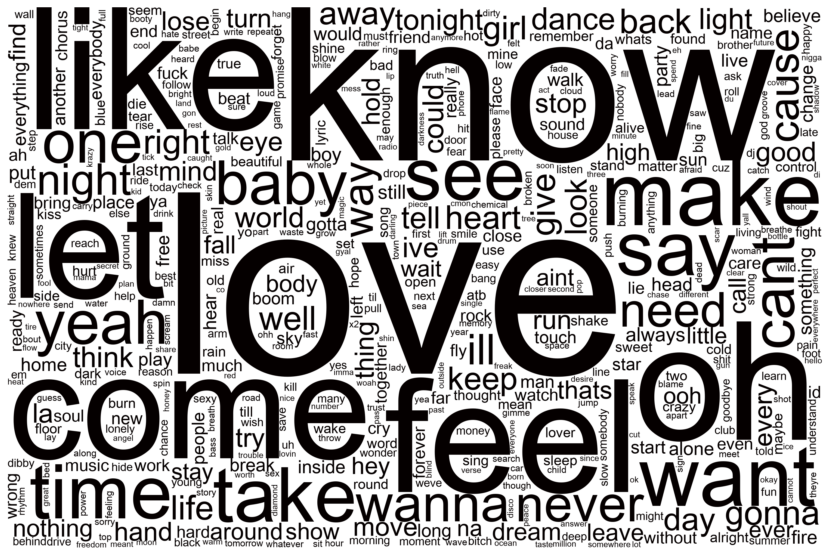

In [36]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(genre_dense_df_transpose['pop'])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# Save the plot
plt.savefig('pop_wordcloud.png')